In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

random_state = 42

In [2]:
dataframe = pd.read_csv("Alzheimers_graph_valued_Dataset_2/train/normalised_indices.csv")
dataframe = pd.DataFrame(dataframe)
dataframe = dataframe.drop(["Unnamed: 0"], axis=1).astype("float32")

In [3]:
dataframe = dataframe.sample(frac=1, random_state=random_state)

In [4]:
oversample = SMOTE(random_state=random_state)

In [5]:
X_train = dataframe.drop(["Dementia_class"],axis=1)
X_train = X_train.sample(frac=1, random_state=random_state)
y_train = dataframe["Dementia_class"]

In [6]:
y_train.value_counts()

Dementia_class
0.0    2560
1.0    1792
2.0     717
3.0      52
Name: count, dtype: int64

In [7]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [8]:
y_train.value_counts()

Dementia_class
1.0    2560
0.0    2560
2.0    2560
3.0    2560
Name: count, dtype: int64

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5121 entries, 530 to 860
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sz_index        5121 non-null   float32
 1   PI_index        5121 non-null   float32
 2   ABC_index       5121 non-null   float32
 3   NGG_index       5121 non-null   float32
 4   Mo_index        5121 non-null   float32
 5   Dementia_class  5121 non-null   float32
dtypes: float32(6)
memory usage: 160.0 KB


/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


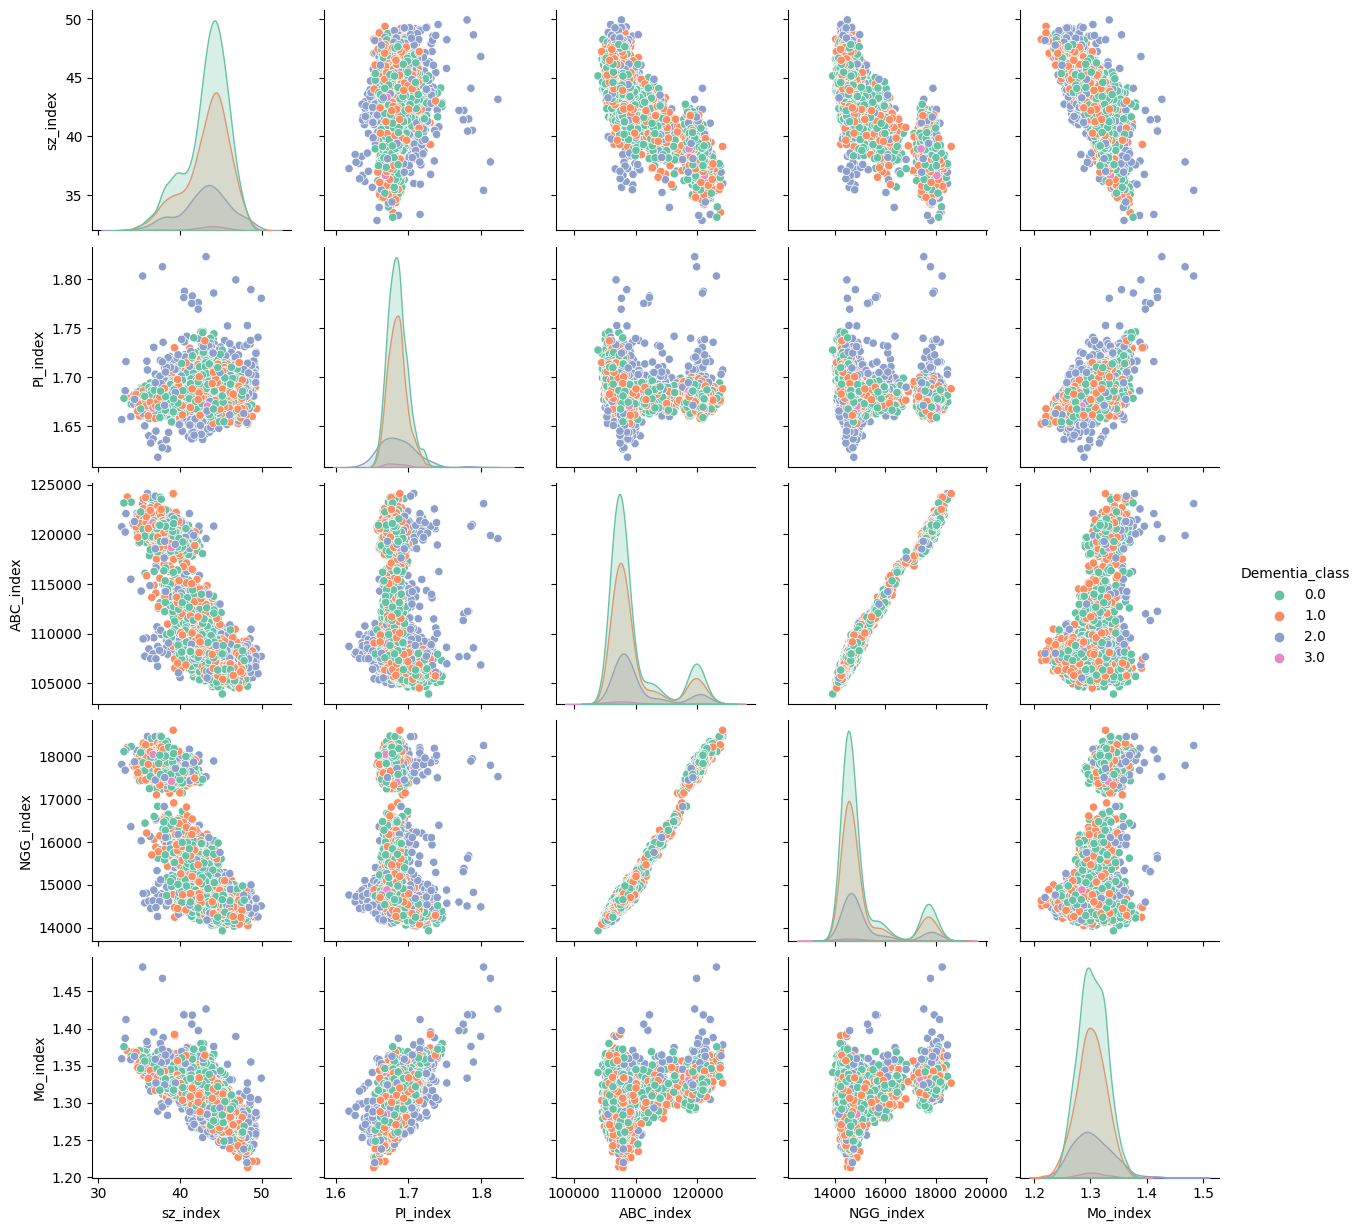

In [10]:
sns.pairplot(data=dataframe, hue="Dementia_class", palette="Set2")
plt.show()

In [10]:
features = dataframe.loc[:,["sz_index", "PI_index", "ABC_index", "NGG_index", "Mo_index"]]

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5121 entries, 530 to 860
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sz_index   5121 non-null   float32
 1   PI_index   5121 non-null   float32
 2   ABC_index  5121 non-null   float32
 3   NGG_index  5121 non-null   float32
 4   Mo_index   5121 non-null   float32
dtypes: float32(5)
memory usage: 140.0 KB


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)

In [14]:
X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [15]:
what = pd.DataFrame(X_train)
what.head()

,0,1
0,9136.385742,-229.401337
1,-1336.434082,94.682854
2,-457.708252,-125.079582
3,8177.629395,-103.592407
4,-2804.305664,-2.836065


In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# Create an SVM with a polynomial kernel of a higher degree
degree = 3  # You can increase this to increase the dimension
svm = SVC(kernel='poly', degree=degree)

# Train the model
# features = dataframe.loc[:,["sz_index", "Mo_index", "Weiner_index"]]
# svm.fit(X_train, dataframe.demented_class)
svm.fit(X_train, y_train)

# Plot the decision boundary
# plt.scatter(features.Mo_index, features.Weiner_index, c=dataframe.demented_class, s=40, cmap=plt.cm.Paired)


# plt.figure(figsize=(24,4))

# plt.suptitle("SVM",fontsize=20)

SVC(kernel='poly')

In [23]:
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'white'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

: 

: 

In [17]:
logistic = LogisticRegression()

logistic.fit(X_train, dataframe.demented_class)

AttributeError: 'DataFrame' object has no attribute 'demented_class'

In [18]:
X_set, y_set = X_train, dataframe.demented_class
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'white'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

AttributeError: 'DataFrame' object has no attribute 'demented_class'